In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part I Prediction

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('daily_weather.csv')

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)

In [5]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [6]:
del data['number']
data = data.dropna()

In [7]:
# Binarize the relative_humidity_3pm to 0 or 1.

clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1

In [8]:
y = clean_data[['high_humidity_label']]
type(y)
y.shape

(1064, 1)

In [9]:
# Use 9am Sensor Signals as Features to Predict Humidity at 3pm

morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [10]:
X = clean_data[morning_features]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)

Tasks:
- Train a logistic regression model 
- Train a SVM model by tunning both C and gamma, report the best parameters 
- Train a decision tree model by tuning the proper parameters, report the best parameters 
- Use the same parameters to train a random forest model 
- Compare all the above models' performance 


In [12]:

model_metrics = []
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
lr_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print("AUC for logistic regression: {:.3f}".format(lr_auc))

#Appending the results
model_metrics.append({'Model Name' : 'Logistic regression','Best Parameters' : '-', 'Train score': logreg.score(X_train, y_train),'Test score': logreg.score(X_test, y_test), 'AUC Score':lr_auc})


Logistic Regression
Training set score: 0.718
Test set score: 0.714
AUC for logistic regression: 0.801


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state = 0)
#define a list of parameters
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}
#running gridsearch
grid_tree = GridSearchCV(tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print("Decision Tree Classifier")
print('Best Parameters: ',grid_tree.best_params_)

print("Training set score: {:.3f}".format(grid_tree.score(X_train,y_train)))
print("Test set score: {:.3f}".format(grid_tree.score(X_test,y_test)))

gridtree_auc = roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:,1])
print("AUC for Decision Tree: {:.3f}".format(gridtree_auc))

#Appending the results
model_metrics.append({'Model Name' : 'Decision Tree Classifier','Best Parameters' : grid_tree.best_params_, 'Train score': grid_tree.score(X_train,y_train),'Test score': grid_tree.score(X_test,y_test), 'AUC Score' : gridtree_auc}) 



Decision Tree Classifier
Best Parameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Training set score: 0.769
Test set score: 0.748
AUC for Decision Tree: 0.800


In [14]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_leaf_nodes=4,max_depth = 2, min_samples_split = 2,random_state=0)
rnd_clf.fit(X_train, y_train)
print("Random Forest Classifier")
print("Training score: ",rnd_clf.score(X_train,y_train))
print("Test score: ",rnd_clf.score(X_test,y_test))

rndclf_auc = roc_auc_score(y_test, rnd_clf.predict_proba(X_test)[:,1])
print("AUC for Random Forest Classifier: {:.3f}".format(rndclf_auc))

model_metrics.append({'Model Name' : 'Random Forest Classifier','Best Parameters' : '-', 'Train score': rnd_clf.score(X_train,y_train),'Test score': rnd_clf.score(X_test,y_test),'AUC Score': rndclf_auc}) 



Random Forest Classifier
Training score:  0.7794486215538847
Test score:  0.7631578947368421
AUC for Decision Tree: 0.841


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [15]:
#SVM MODEL
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
linear_svc = LinearSVC()

#define a list of parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc = GridSearchCV(linear_svc, params_svc, cv=5, n_jobs=2,scoring = 'roc_auc', return_train_score=True)
grid_svc.fit(X_train, y_train)


print("Linear Support Vector Machine")
print('Best Parameters: ',grid_svc.best_params_)
print('train score: ', grid_svc.score(X_train, y_train))
print('test score: ', grid_svc.score(X_test, y_test))

linear_auc = grid_svc.best_score_
print("AUC for Linear SVM: {:.3f}".format(linear_auc))


model_metrics.append({'Model Name' : 'Linear SVM','Best Parameters' :grid_svc.best_params_ , 'Train score': grid_svc.score(X_train, y_train),'Test score': grid_svc.score(X_test, y_test),'AUC Score' : linear_auc})


Linear Support Vector Machine
Best Parameters:  {'C': 10}
train score:  0.716474445952058
test score:  0.7272418285843766
AUC for Linear SVM: 0.770


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
from sklearn.svm import SVC
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_rbf = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc_rbf.fit(X_train, y_train)
print("Radial Bias Support Vector Machine")
print('Best Parameters: ',grid_svc_rbf.best_params_)
print('Train score: ', grid_svc_rbf.score(X_train, y_train))
print('Test score: ', grid_svc_rbf.score(X_test, y_test))

rbf_auc = grid_svc_rbf.best_score_
print("AUC for Radial SVM: {:.3f}".format(rbf_auc))
model_metrics.append({'Model Name' : 'Radial Bias SVM','Best Parameters' :grid_svc_rbf.best_params_ , 'Train score': grid_svc_rbf.score(X_train, y_train),'Test score': grid_svc_rbf.score(X_test, y_test),'AUC Score': rbf_auc})



Radial Bias Support Vector Machine
Best Parameters:  {'C': 1, 'gamma': 0.1}
Train score:  1.0
Test score:  0.8977794142638645
AUC for Radial SVM: 0.906


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#Representing the model results in a tabular column
model_results = pd.DataFrame(model_metrics)
model_results.set_index('Model Name', inplace = True)
model_results

,Best Parameters,Train score,Test score,AUC Score
Model Name,,,,
Logistic regression,-,0.718045,0.714286,0.800997
Decision Tree Classifier,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.769424,0.748120,0.800402
Random Forest Classifier,-,0.779449,0.763158,0.841245
Linear SVM,{'C': 10},0.716474,0.727242,0.769708
Radial Bias SVM,"{'C': 1, 'gamma': 0.1}",1.000000,0.897779,0.906204


#### Looking at the test score and the AUC score, we can say that the Radial Bias Support Vector Machine model performing better than the other models.

### Best Model : Radial Bias Support Vector Machine model

# Part II Clustering

In [18]:
data = pd.read_csv('minute_weather.csv')

## Weather data

In [19]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [20]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [21]:
data.shape

(1587257, 13)

In [22]:
#Lots of rows, so let us sample down by taking every 10th row.
sampled_df = data[(data['rowID']%10) == 0]
sampled_df.shape

(158726, 13)

In [23]:
sampled_df = sampled_df.dropna()

In [24]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [25]:
select_df = sampled_df[features]

In [26]:
#Standardize the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48457779,  0.03247287, -0.1905634 , ...,  0.03826302,
        -0.66172102, -0.34710411],
       [-1.51734678,  0.1237468 , -0.65236961, ..., -0.44847591,
        -0.372321  ,  0.40839584],
       [-1.51734678,  0.06289752, -0.74682997, ..., -0.6539879 ,
        -0.41366386,  0.39313322],
       ...,
       [-0.30489432,  1.15818466,  1.90855574, ...,  2.03930084,
        -0.70306388,  0.01538324],
       [-0.30489432,  1.12776002,  2.06598967, ..., -1.67073143,
        -0.74440674, -0.04948292],
       [-0.30489432,  1.09733538, -1.6389556 , ..., -1.55175081,
        -0.62037816, -0.05711423]])

Tasks:

- Train a KMeans clustering model.
- Visualize the differences of feature "air_temp" among different clusters. 




In [27]:

#KMeans Clustering model

from sklearn.cluster import KMeans

#Training the Kmeans model for a range of k values from 1 to 15
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    


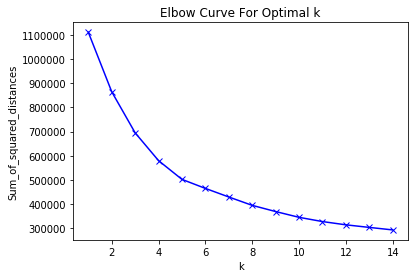

In [28]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Curve For Optimal k')
plt.show()


#### From the elbow curve we can find the optimum value of k(number of clusters) to be 5.

In [29]:
#Training KMeans model for k(number of clusters) = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print("KMeans Model:\n", kmeans)

KMeans Model:
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [38]:
print("Cluster Membership Predicted value:")
kmeans.predict(X) 

Cluster Membership Predicted value:


array([4, 0, 0, ..., 4, 4, 0], dtype=int32)

In [39]:
predict_labels = pd.DataFrame(data= kmeans.predict(X).flatten())
predict_labels.columns = ['predict_labels']
air_temp_df = pd.DataFrame(X)
air_temp_df = pd.concat([air_temp_df,predict_labels],axis=1)
air_temp_df.drop(columns=[0,2,3,4,5,6],inplace=True)
air_temp_df = air_temp_df.rename(columns={1: "air_temp"})

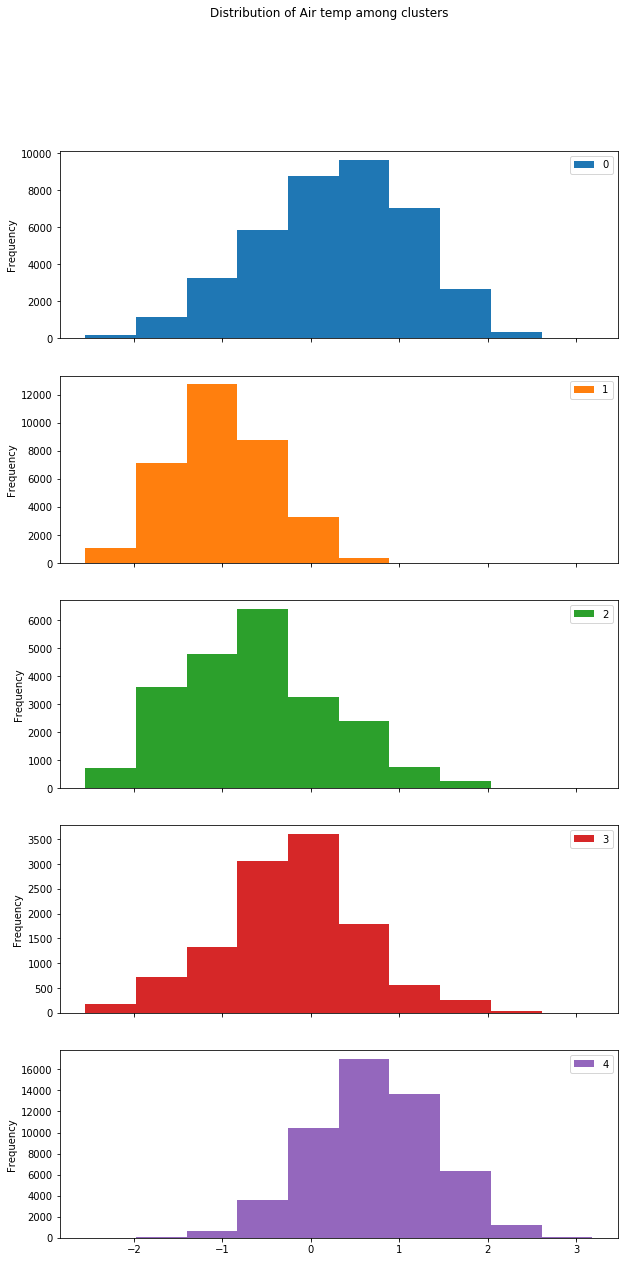

In [40]:
pivot = air_temp_df.pivot(columns='predict_labels', values='air_temp')
pivot.plot(kind='hist', subplots=True, align='mid',figsize=(10,20), title = "Distribution of Air temp among clusters")

plt.show()